
## MED 4 

# Regresja wieloraka

Prognozowanie cen domów (wiele zmiennych)

W tym notatniku wykorzystamy dane dotyczące sprzedaży domów. Przewidywanie ich ceny zostanie dokonane przy pomocy regresji wielorakiej. Pierwsze zadanie dotyczy eksploracji regresji wielorakiej poprzez opracowanie nowych cech i pomiar błędu. W drugim zadaniu zaimplementować należy algorytm spadku gradientu.

     Użyj wbudowanych funkcji tworzenia wykresów (lub w inny sposób), aby obliczyć wagi regresji (współczynniki)
     Biorąc pod uwagę wagi regresji, predyktory i wynik napisz funkcję obliczającą resztkową sumę kwadratów.
     Spójrz na współczynniki i zinterpretuj ich znaczenie.
     Oceń wiele modeli za pomocą RSS.

# Potrzebne biblioteki

In [1]:
import pandas as pd
import numpy as np

# Wczytanie danych ceny domów 

Zestaw danych pochodzi ze sprzedaży domów w King County, regionie, w którym znajduje się miasto Seattle w stanie Waszyngton.

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
domy = pd.read_csv('data/kc_house_data.csv',sep=',', dtype=dtype_dict)

In [3]:
domy.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


<Axes: >

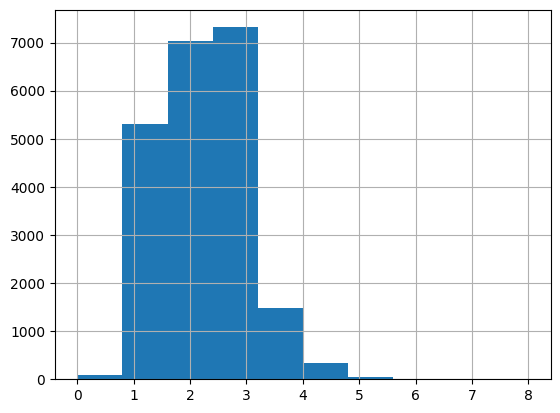

In [4]:
domy.bathrooms.hist()

# Podziel dane na uczące i testowe.
Używamy seed = 0, aby każdy, kto korzysta z tego notebooka, uzyskał te same wyniki. W praktyce możesz ustawić podział losowy.

In [5]:
y = domy['price']
X = domy.drop(['price'], axis=1)
features = X.columns.values
features 

array(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Nauka modelu regresji wielorakiej

Wykorzystując cechy 'sqft_living', 'bedrooms', 'bathrooms' uczymy nasz model.

In [7]:
example_features = ['sqft_living', 'bedrooms', 'bathrooms']
pinw = np.linalg.pinv(X_train[example_features])
w = np.dot(pinw,y_train)

Po dopasowaniu modelu możemy wyodrębnić współczynniki (wagi) modelu regresji:

In [8]:
print('Otrzymane współczynniki:', w)


Otrzymane współczynniki: [   308.54966331 -41754.38204544  17354.12106635]


# Przewidywanie wartości modelu

Mając wyliczone parametry modelu napisz funkcję do przewidywania wartości dla zadanego modelu

In [15]:
def predict_output( features, weights):
    predictions = np.dot(features, weights)
    return (predictions)

In [18]:
predict_output(X_train[example_features], w)


array([376513.94632314, 467340.55721729, 237087.16846861, ...,
       641960.83166918, 598953.41599022, 606377.44288989])

# Wyliczamy błąd (SSE -  sum of squared estimate of errors)

Teraz, gdy możemy wykonać przewidywania na podstawie modelu, napiszmy funkcję obliczającą RSS modelu. Wykonaj poniższą funkcję, aby obliczy sumę kwadratów błędu estymacji (SSE) na podstawie modelu, danych i wyniku.

In [19]:
def policz_SSE(model, data, outcome):
    # Wylicz przewidywaną wartość
    predicted_values = predict_output(data, model)
    # Policz błąd bezwzglęny
    errors = np.subtract(outcome, predicted_values)

    # Podnieś błędy do kwadratu i zsumuj je lub skorzystaj z mnożenia wektorów.
    SSE = np.dot(errors, errors)
    return(SSE)    

Przetestuj swoją funkcję obliczając błąd SSE z danych TEST dla przykładowego modelu:

In [20]:

przykladowe_rss = policz_SSE(w, X_test[example_features], y_test)
# print(rss_example_train) 
przykladowe_rss


261738485259246.84

# Utwórz nowe cechy

Mimo iż nasz model regresji wielorakiej obejmuje wiele różnych cech (np. ilosc_sypiani, powierzchnia i ilosc_lazienek) możemy również rozważyć przekształcenie istniejących cech, np. log(powierzchnia) czy nawet mnożenie ilości sypialni i łazienek.

Użyjemy funkcji logarytmu, aby utworzyć nowe cechy, więc najpierw importujemy ją z biblioteki matematycznej.

In [22]:
from math import log

Następnie utwórz następujące 4 nowe cechy jako kolumny w danych TRENINGOWYCH i TESTOWYCH:
* bedrooms_squared = bedrooms\*bedrooms
* bed_bath_rooms = bedrooms\*bathrooms
* log_sqft_living = log(sqft_living)
* lat_plus_long = lat + long 

Jako przykład oto pierwsza:

In [23]:
# bedrooms_squared
X_train['bedrooms_squared'] = X_train['bedrooms'].apply(lambda x: x**2)
X_test['bedrooms_squared'] = X_test['bedrooms'].apply(lambda x: x**2)


In [24]:
# utwórz pozostałe 3 funkcje zarówno w danych TRENINGOWYCH, jak i TESTOWYCH
# bedrooms times bathrooms
X_train['bed_bath_rooms'] = X_train['bedrooms']*X_train['bathrooms']
X_test['bed_bath_rooms'] = X_test['bedrooms']*X_test['bathrooms']

# log squarefeet
X_train['log_sqft_living'] = X_train['sqft_living'].apply(lambda x: log(x))
X_test['log_sqft_living'] = X_test['sqft_living'].apply(lambda x: log(x))

# lat plus long
X_train['lat_plus_long'] = X_train['lat'] + X_train['long']
X_test['lat_plus_long'] = X_test['lat'] + X_test['long']


* Kwadrat sypialni zwiększa separację między nielicznymi sypialniami (np. 1) i wieloma sypialniami (np. 4), ponieważ 1 ^ 2 = 1, ale 4 ^ 2 = 16. W konsekwencji ta funkcja będzie miała wpływ głównie na domy z wieloma sypialniami.
* Sypialnia razy łazienka daje tak zwaną funkcję „interakcji”. Wynik jest wysoki, gdy  wartościu *obu* cech są duże.
* Przejęcie logarytmu stóp kwadratowych powoduje zbliżenie dużych wartości i rozłożenie małych wartości. Wynika to z reguły prawoskośności posiadanych danych/posiadanego atrybutu.
* Dodawanie szerokości do długości geograficznej jest całkowicie bezsensowne, ale i tak to zrobimy (zobaczymy później dlaczego)

**Pytanie quizu: Jaka jest średnia (średnia arytmetyczna) twoich 4 nowych funkcji w danych TEST? (w zaokrągleniu do 2 cyfr)**

In [25]:
print(round(X_test['bedrooms_squared'].mean(), 2))
print(round(X_test['bed_bath_rooms'].mean(), 2))
print(round(X_test['log_sqft_living'].mean(), 2))
print(round(X_test['lat_plus_long'].mean(), 2))

12.21
7.45
7.55
-74.65


# Uczenie wielu modeli

Teraz poznamy wagi trzech (zagnieżdżonych) modeli do przewidywania cen domów. Pierwszy model będzie miał najmniej cech, drugi model doda jedną cechę, a trzeci doda jeszcze kilka:
* Model 1: squarefeet, # bedrooms, # bathrooms, latitude & longitude
* Model 2: + bedrooms\*bathrooms
* Model 3: + log squarefeet, bedrooms squared, i (bezsensowne) latitude + longitude

In [26]:
model_1_features = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
model_2_features = model_1_features + ['bed_bath_rooms']
model_3_features = model_2_features + ['bedrooms_squared', 'log_sqft_living', 'lat_plus_long']

Teraz, gdy mamy już cechy, poznaj wagi trzech różnych modeli do przewidywania docelowej = „ceny” za pomocą funkcji model_train i spójrz na wartość wag/współczynników:

In [27]:
# Funkcja szukająca współczynników modelu
def model_train(X_train, Y_train):
    # Wylicz współczynniki modelu wykorzystując pseudoodwrotność
    pinw = np.linalg.pinv(X_train)
    model = np.dot(pinw,Y_train)
    # predictions = predict_output(X_train, model)
    return model

In [28]:
# Wyucz 3 modele:
# model 1
model_1 = model_train(X_train[model_1_features], y_train)

# model 2
model_2 = model_train(X_train[model_2_features], y_train)

# model 3
model_3 = model_train(X_train[model_3_features], y_train)

In [29]:
# Wyświetl wagi współczynników modelu:
print(f"Wspolczynniki modelu 1: {model_1}")
print(f"Wspolczynniki modelu 2: {model_2}")
print(f"Wspolczynniki modelu 3: {model_3}")

Wspolczynniki modelu 1: [ 3.00159310e+02 -5.23689819e+04  4.58247068e+03  5.29238529e+05
  2.05262847e+05]
Wspolczynniki modelu 2: [ 2.92464746e+02 -1.21761358e+05 -1.09383881e+05  5.30036632e+05
  2.03619080e+05  3.35897011e+04]
Wspolczynniki modelu 3: [ 5.55032435e+02  1.34221113e+03  8.84250144e+04  3.03201909e+05
 -6.29628448e+04 -1.60202196e+04  8.18714827e+02 -6.45602857e+05
  2.40239065e+05]


In [21]:
# w pierwszym modelu dla lazienek jest dodatni w pierwszym modelu posiadanie lazienek jest pozadane
# w drugim modelu dla lazienek jest ujemny w drugim modelu posiadanie lazienek jest niepozadane poniewaz bardziej pozadane jest posiadanie duzej ilosci lazienek i sypialni

**Quiz: Jaki jest znak (dodatni lub ujemny) dla współczynnika/wagi dla „łazienek” w modelu 1?**

**Quiz: Jaki jest znak (dodatni lub ujemny) dla współczynnika/wagi dla „łazienek” w modelu 2?**

Zastanów się, co to znaczy.

# Porównywanie wielu modeli

Teraz, gdy otrzymaliśmy trzy modele i wyodrębniliśmy wagi modeli, chcemy ocenić, który model jest najlepszy.

Używając wcześniej opisanych funkcji obliczy SSE dla danych uczących dla każdego z trzech modeli.

In [30]:
# Policz SSE na danych TRENINGOWYCH dla każdeg z 3 modeli i zapisz wartości:
# model 1
model_1_train_SSE = policz_SSE(model_1, X_train[model_1_features], y_train)

# model 2
model_2_train_SSE = policz_SSE(model_2, X_train[model_2_features], y_train)

# model 3
model_3_train_SSE = policz_SSE(model_3, X_train[model_3_features], y_train)

print(f"SSE modelu 1: {model_1_train_SSE}")
print(f"SSE modelu 2: {model_2_train_SSE}")
print(f"SSE modelu 3: {model_3_train_SSE}")


SSE modelu 1: 1082381909711003.1
SSE modelu 2: 1065791753438926.4
SSE modelu 3: 991825573399600.0


**Quiz: Który model (1, 2 lub 3) ma najniższy poziom SSE na danych TRENINGOWYCH?** Czy tego się spodziewałeś/-łaś?

In [23]:
# Najmniejsze SSE na danych TRENINGOWYCH ma model 3
# Bardziej prawdopodobne wydawalo sie to ze model 2 bedzie mial najmniejsze SSE na danych TRENINGOWYCH poniewaz model
# 2 zawiera w sobie model 1 i dodatkowo dodaje nowa zmienna bed_bath_rooms ktora powinna poprawic wynik modelu i ma sens

Teraz obliczyć SSE na danych TEST dla każdego z trzech modeli.

In [24]:
# Teraz obliczyć SSE na danych TEST dla każdego z trzech modeli i zapisz wartości:
# model 1
model_1_test_SSE = policz_SSE(model_1, X_test[model_1_features], y_test)

# model 2
model_2_test_SSE = policz_SSE(model_2, X_test[model_2_features], y_test)

# model 3
model_3_test_SSE = policz_SSE(model_3, X_test[model_3_features], y_test)

print(f"SSE modelu 1: {model_1_test_SSE}")
print(f"SSE modelu 2: {model_2_test_SSE}")
print(f"SSE modelu 3: {model_3_test_SSE}")


SSE modelu 1: 233700269953883.4
SSE modelu 2: 229575356886061.56
SSE modelu 3: 221041949402647.0


**Quiz: Który model (1, 2 lub 3) ma najniższy poziom SSE na danych TESTOWYCH?** Czy tego się spodziewałeś/-łaś? Pomyśl o cechach, które zostały dodane do każdego z modeli.

In [25]:
# Najmniejsze SSE na danych TESTOWYCH ma model 3
# Bardziej prawdopodobne wydawalo sie to ze model 2 bedzie mial najmniejsze SSE na danych TESTOWYCH poniewaz model
# 2 zawiera w sobie model 1 i dodatkowo dodaje nowa zmienna bed_bath_rooms ktora powinna poprawic wynik modelu, jednakze 
# z jakiegos powodu model 3 ma mniejsze SSE na danych TESTOWYCH mimo dodania takich wspolczynnikow jak bedrooms_squared, log_sqft_living, lat_plus_long

# Policz pochodną

Przejdziemy teraz do obliczania pochodnej funkcji kosztu regresji. Przypomnij sobie, że funkcja kosztu jest sumą kwadratów różnic między punktami danych a przewidywanym wynikiem.

Ponieważ pochodna sumy jest sumą pochodnych, możemy obliczyć pochodną dla pojedynczego punktu danych, a następnie zsumować na podstawie punktów danych. Możemy zapisać kwadratową różnicę między obserwowanym a przewidywanym wynikiem dla pojedynczego punktu w następujący sposób:

(w[0]\*[CONSTANT] + w[1]\*[cecha_1] + ... + w[i] \*[cecha_i] + ... +  w[k]\*[cecha_k] - output)^2

Gdzie mamy *k* cech i stałą. Tak więc pochodną w odniesieniu do wagi w[i] według reguły łańcucha jest:

2\*(w[0]\*[CONSTANT] + w[1]\*[cecha_1] + ... + w[i] \*[cecha_i] + ... +  w[k]\*[cecha_k] - output)\* [cecha_i]

Pojęcie w nawiasach to tylko błąd (różnica między prognozowaniem a wyjściem). Możemy więc ponownie napisać to jako:

2\*error\*[cecha_i]

Oznacza to, że pochodną wagi cechy *i* jest suma (ponad punkty danych) 2-krotności iloczynu błędu i samej cechy. W przypadku stałej jest to tylko dwukrotność sumy błędów!

Przypomnijmy, że dwukrotność sumy iloczynu dwóch wektorów jest tylko dwukrotnością iloczynu dwóch wektorów. Dlatego pochodna wagi dla *cechy_i* jest tylko dwukrotnością iloczynu między wartościami *cechy_i* a bieżącymi błędami.

Mając to na uwadze, należy napisać następującą funkcję liczącą pochodną, która oblicza pochodną współczynnika na podstawie wartości cechy (we wszystkich punktach danych) i błędów (we wszystkich punktach danych).

In [31]:
def feature_derivative(errors, feature):
    # Oblicz podwojony iloczyn cech i błędów, a następnie zwróć otrzymną wartość
    return 2 * np.dot(errors,feature)

# Metoda spadku gradientu / gradientu prostego (Gradient Descent)

Teraz napiszemy funkcję, która wykonuje spadek gradientu. Biorąc pod uwagę punkt początkowy, aktualizujemy bieżące wagi, przesuwając się w kierunku ujemnego gradientu. Przypomnijmy, że gradient jest kierunkiem *wzrostu*, a zatem gradient ujemny jest kierunkiem *spadku* i staramy się *zminimalizować* funkcję kosztu.

Współczynnik, z jakim poruszamy się w kierunku gradientu ujemnego, nazywa się „rozmiarem kroku” - $\alpha$. Zatrzymujemy się, gdy jesteśmy „wystarczająco blisko” do rozwiązania optymalnego. Definiujemy to, wymagając, aby wielkość (długość) wektora gradientu była mniejsza niż stała „tolerancja” - $\epsilon$.

Mając to na uwadze, wykonaj poniższą funkcję spadku gradientu poniżej, używając powyższej funkcji pochodnej. Dla każdego kroku zejścia gradientu aktualizujemy wagę każdej funkcji przed obliczeniem naszych kryteriów zatrzymania

In [32]:
from math import sqrt # wywołanie funkcji na wektorze [g[0], g[1], g[2]] daje sqrt(g[0]^2 + g[1]^2 + g[2]^2)

In [33]:
import numpy as np

In [34]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False 
    weights = np.array(initial_weights) # miej pewność, że wagi są typu numpy array
    print(feature_matrix)
    print(output)
    while not converged:
        # obliczyć prognozy na podstawie feature_matrix i wag za pomocą funkcji predict_output()
        predictions = [predict_output(x, weights) for x in feature_matrix]
        # wylicz błąd predykcji jako: predict_output - output
        errors = np.subtract(predictions, output)
        gradient_sum_squares = 0 # inicjuj sumę pierwiastków gradientów
        # chociaż nie osiągnęliśmy jeszcze tolerancji, zaktualizuj wagę każdej funkcji
        for i in range(len(weights)): # zapętlenie każdej wagi
            # Przypomnij sobie, że feature_matrix [:, i] to kolumna cech powiązana z wagami[i]
            # obliczyć pochodną dla wagi[i]:
            derivative = feature_derivative(errors, feature_matrix[:,i])
            # dodaj kwadrat wartości pochodnej do sumy kwadratów gradientów (ocena zbieżności) 
            gradient_sum_squares = gradient_sum_squares + derivative**2
            # odejmij wielkość kroku pomnożoną przez pochodną od bieżącej wagi
            weights[i] = weights[i] - step_size*derivative
        # oblicz pierwiastek kwadratowy z sumy gradientów kwadratów, aby uzyskać wielkość gradientu:
        gradient_magnitude = sqrt(gradient_sum_squares)
        if gradient_magnitude < tolerance:
            converged = True
    return(weights)

Kilka rzeczy, na które należy zwrócić uwagę, zanim zaczniemy korzystać z metody spadku gradientu. Ponieważ gradient jest sumą wszystkich punktów danych i obejmuje iloczyn błędu i wartości cechy, sam gradient będzie bardzo duży, ponieważ cechy są duże (stopy kwadratowe), a wynik jest duży (ceny). Tak więc, chociaż można oczekiwać, że „tolerancja” będzie niewielka, mała jest jedynie zależna od wielkości cechy.

Z podobnych powodów rozmiar kroku będzie znacznie mniejszy niż można się spodziewać, ale dzieje się tak, ponieważ gradient ma tak duże wartości.

# Uruchamianie spadku gradientu jako prostej regresji

Chociaż metoda spadku gradientu jest zaprojektowane dla regresji wielorakiej, ponieważ stała jest teraz funkcją, możemy użyć funkcji spadku gradientu do oszacowania parametrów prostej regresji na "squarefeet". Następująca komórka ustawia funkcję parametr_macierz, wynik, wagi początkowe i rozmiar kroku dla pierwszego modelu:

In [35]:
def get_numpy_data(train_data, simple_features, my_output):
    output = np.array(train_data[my_output])
    simple_feature_matrix = np.array(train_data[simple_features])
    return simple_feature_matrix, output

In [54]:
# test spadku gradientów
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(domy, simple_features, my_output)
initial_weights = np.array([1.]) #-47000.,
step_size = 7e-12
tolerance = 2.5e7

Następnie uruchom gradient z powyższymi parametrami.

In [55]:
gradient = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)
print(gradient)

[[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
[221900. 538000. 180000. ... 402101. 400000. 325000.]
[263.08924037]


In [ ]:
# Przy pomocy gradientu otrzymalismy wage 263 natomiast przy pseudoodwrotnosci 308.56


Porównaj wagi do tych uzyskanych przy pomocy pseudoodwrotności?

**Pytanie quizu: Jaka jest waga sqft_living - drugi element „simple_weights” (w zaokrągleniu do 1 miejsca po przecinku)?**

In [60]:
simple_features = ['sqft_living', 'bedrooms', 'bathrooms']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(domy, simple_features, my_output)
initial_weights = np.array([100, 1000., -3000., 1000.]) #-47000.,
step_size = 7e-7
tolerance = 2.5e7

Zobacz jak się zachowuje metoda gradientowa po przeskalowaniu wartości cech:

In [61]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
simple_feature_matrix = ss.fit_transform(simple_feature_matrix)
feature_matrix = np.hstack((np.ones((21613, 1)),simple_feature_matrix))

In [62]:
regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance)

[[ 1.         -0.97983502 -0.39873715 -1.44746357]
 [ 1.          0.53363434 -0.39873715  0.1756067 ]
 [ 1.         -1.42625404 -1.47395936 -1.44746357]
 ...
 [ 1.         -1.15404732 -1.47395936 -1.77207762]
 [ 1.         -0.52252773 -0.39873715  0.50022075]
 [ 1.         -1.15404732 -1.47395936 -1.77207762]]
[221900. 538000. 180000. ... 402101. 400000. 325000.]


array([540088.13851152, 282383.36969273, -53530.11962353,   7673.01962108])